In [22]:
import pandas as pd
import numpy as np

from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing
from pandas.plotting import scatter_matrix

matplotlib.style.use('ggplot') # Look Pretty

In [46]:
filename='C:/Users/smith/Documents/Becky/HawkWatch/Scripts/label_output_set_1.csv'
df_label=pd.read_csv(filename, sep=',', header=0)
df_label  = df_label[ (df_label['Night'] != 1)]
df_label = df_label.drop(columns=['File', 'Dir', 'SeqNum', 'SeqLen'])
df_label.head()

,Datetime,Camera,Night,Label
0,2016:11:11 17:00:34,CAM74,0,0
1,2016:11:11 17:00:36,CAM74,0,0
2,2016:11:11 17:00:37,CAM74,0,0
3,2016:11:11 17:00:41,CAM74,0,0
4,2016:11:11 17:00:44,CAM74,0,0


In [47]:
filename='C:/Users/smith/Documents/Becky/HawkWatch/Scripts/sequence_out_set_1.csv'
df_data=pd.read_csv(filename, sep=',', header=0)
# split the data set into the header record with DistRank=0 and closest object record with DistRank=1
df_header  = df_data[(df_data['DistRank'] == 0) & (df_data['Night'] != 1)]
df_header = df_header.drop(columns=['File', 'Dir', 'SeqNumDiff', 'TopCrop', 'BottomCrop', 'Deer_X', 'Deer_Y', 'Size', 'X', 'Y', 'DistRank', 'Dist', 'Angle'])
df_header.head()


,Datetime,Camera,SeqNum,SeqLen,Night,Mean,Std,NumObj
0,2016:11:11 17:00:34,CAM74,1.0,3.0,0.0,81.74,75.94,12.0
13,2016:11:11 17:00:36,CAM74,2.0,3.0,0.0,107.93,75.32,2.0
16,2016:11:11 17:00:37,CAM74,3.0,3.0,0.0,104.41,75.46,4.0
21,2016:11:11 17:00:41,CAM74,1.0,3.0,0.0,47.87,65.85,3.0
25,2016:11:11 17:00:44,CAM74,2.0,3.0,0.0,23.58,46.08,6.0


In [48]:
df_closest = df_data[(df_data['DistRank'] == 1)]
df_closest = df_closest.drop(columns=['File', 'Dir', 'SeqNum', 'SeqLen', 'Night', 'Mean', 'Std', 'NumObj', 'DistRank','SeqNumDiff', 'TopCrop', 'BottomCrop', 'Deer_X', 'Deer_Y'])
df_closest.head()

,Datetime,Camera,Size,X,Y,Dist,Angle
3,2016:11:11 17:00:34,CAM74,272629.0,812.0,812.0,203.0,-80.0
15,2016:11:11 17:00:36,CAM74,11053.0,967.0,967.0,380.0,71.0
20,2016:11:11 17:00:37,CAM74,12951.0,1013.0,1013.0,196.0,-31.0
22,2016:11:11 17:00:41,CAM74,638040.0,1204.0,1204.0,380.0,-19.0
29,2016:11:11 17:00:44,CAM74,15708.0,1116.0,1116.0,453.0,-53.0


In [49]:
# Join df_header and df_label
df_result = pd.merge(df_header, df_label, how='left', on=['Datetime', 'Camera'])
df_result = pd.merge(df_result, df_closest, how='left', on=['Datetime', 'Camera'])
df_result.head()

,Datetime,Camera,SeqNum,SeqLen,Night_x,Mean,Std,NumObj,Night_y,Label,Size,X,Y,Dist,Angle
0,2016:11:11 17:00:34,CAM74,1.0,3.0,0.0,81.74,75.94,12.0,0,0,272629.0,812.0,812.0,203.0,-80.0
1,2016:11:11 17:00:36,CAM74,2.0,3.0,0.0,107.93,75.32,2.0,0,0,11053.0,967.0,967.0,380.0,71.0
2,2016:11:11 17:00:37,CAM74,3.0,3.0,0.0,104.41,75.46,4.0,0,0,12951.0,1013.0,1013.0,196.0,-31.0
3,2016:11:11 17:00:41,CAM74,1.0,3.0,0.0,47.87,65.85,3.0,0,0,638040.0,1204.0,1204.0,380.0,-19.0
4,2016:11:11 17:00:44,CAM74,2.0,3.0,0.0,23.58,46.08,6.0,0,0,15708.0,1116.0,1116.0,453.0,-53.0


In [50]:
# Fill or drop NaN. Are the number of objects zero for these? 
df_result.fillna(value=0, axis=0, inplace=True)


In [51]:
# remove non-numeric fields
df_x = df_result.drop(columns=['Datetime', 'Camera', 'SeqNum', 'SeqLen', 'Night_x', 'Night_y', 'X', 'Y'])
df_x = df_x.drop(columns=['Mean', 'Std'])
#df_x.to_csv("photo_set_1_data.csv", sep=',', index=False) 
#df_x = df_x.drop(columns=['Label'])
#df_x = df_x.drop(columns=['Angle'])  # needed angle
#df_x = df_x.drop(columns=['NumObj'])

df_x.head()

,NumObj,Label,Size,Dist,Angle
0,12.0,0,272629.0,203.0,-80.0
1,2.0,0,11053.0,380.0,71.0
2,4.0,0,12951.0,196.0,-31.0
3,3.0,0,638040.0,380.0,-19.0
4,6.0,0,15708.0,453.0,-53.0


In [52]:
df_x.describe()

,NumObj,Label,Size,Dist,Angle
count,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000
mean,2.646760,0.280178,71303.731893,325.597205,-10.303050
std,2.056667,0.449229,98913.548039,219.134381,40.309376
min,0.000000,0.000000,0.000000,0.000000,-90.000000
25%,1.000000,0.000000,14322.250000,171.250000,-37.000000
50%,2.000000,0.000000,43036.500000,343.000000,-20.000000
75%,4.000000,1.000000,89318.750000,472.000000,3.000000
max,15.000000,1.000000,845868.000000,1249.000000,90.000000


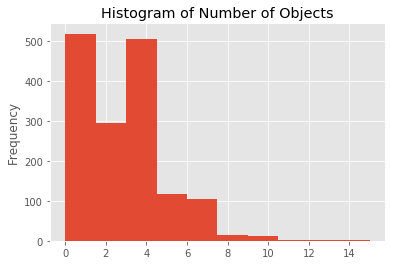

In [53]:
df_x.NumObj.plot.hist()
plt.title("Histogram of Number of Objects")
plt.show()

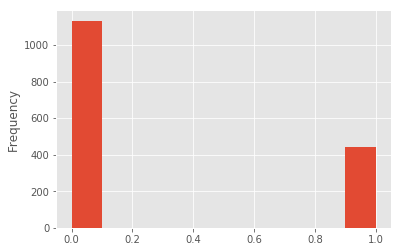

In [54]:
df_x.Label.plot.hist()
plt.show()

In [74]:
pre_proc = preprocessing.StandardScaler()
df_tmp = df_x.loc[:, ['Size', 'Dist', 'Angle']]

pre_proc.fit(df_tmp)
np_scaled = pre_proc.transform(df_tmp)
df_scaled = pd.DataFrame(columns=['Size', 'Dist', 'Angle'])
df_scaled['Size'] = np_scaled[:,0]
df_scaled['Dist'] = np_scaled[:,1]
df_scaled['Angle'] = np_scaled[:,2]
print(np_scaled[0:5])
df_scaled.head()

[[ 2.03601282 -0.5596391  -1.7296001 ]
 [-0.60931876  0.24834116  2.01761716]
 [-0.59012419 -0.59159312 -0.51361569]
 [ 5.73143311  0.24834116 -0.21582359]
 [-0.5622425   0.58157595 -1.05956788]]


,Size,Dist,Angle
0,2.036013,-0.559639,-1.729600
1,-0.609319,0.248341,2.017617
2,-0.590124,-0.591593,-0.513616
3,5.731433,0.248341,-0.215824
4,-0.562243,0.581576,-1.059568


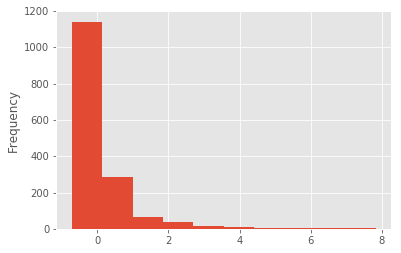

In [75]:
df_scaled.Size.plot.hist()
plt.show()

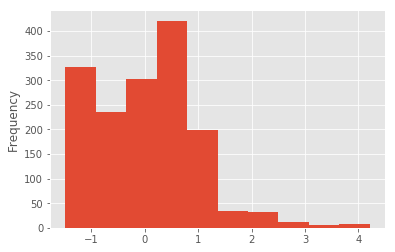

In [76]:
df_scaled.Dist.plot.hist()
plt.show()

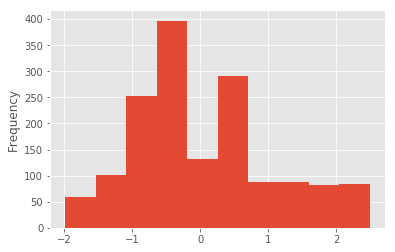

In [77]:
df_scaled.Angle.plot.hist()
plt.show()

In [78]:
df_x.Angle.median()

-20.0

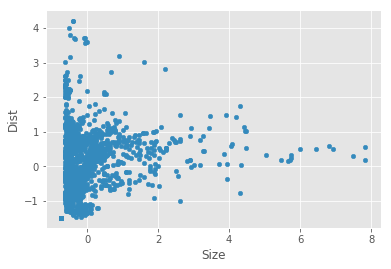

           Size      Dist     Angle
Size   1.000000  0.244076 -0.054479
Dist   0.244076  1.000000 -0.046293
Angle -0.054479 -0.046293  1.000000


In [80]:
df_scaled.plot.scatter(x='Size', y='Dist')
plt.show()
print(df_scaled.corr())

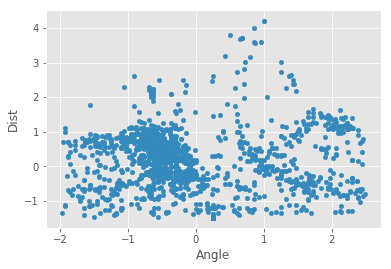

           Size      Dist     Angle
Size   1.000000  0.244076 -0.054479
Dist   0.244076  1.000000 -0.046293
Angle -0.054479 -0.046293  1.000000


In [81]:
df_scaled.plot.scatter(x='Angle', y='Dist')
plt.show()
print(df_scaled.corr())

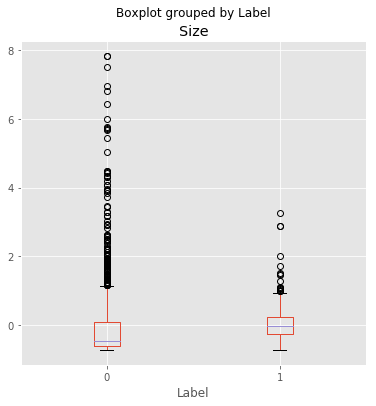

In [89]:
df_tmp = pd.concat([df_scaled['Size'], df_x['Label']],axis=1)
df_tmp.boxplot(column=['Size'], by='Label', figsize=(6,6))
plt.show()

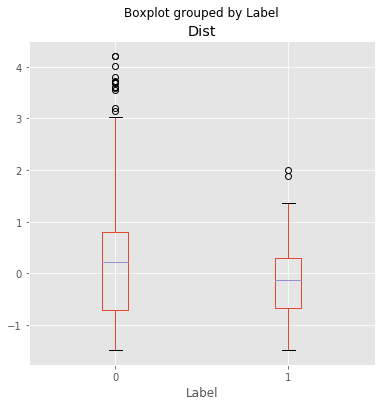

In [90]:
df_tmp = pd.concat([df_scaled['Dist'], df_x['Label']],axis=1)
df_tmp.boxplot(column=['Dist'], by='Label', figsize=(6,6))
plt.show()

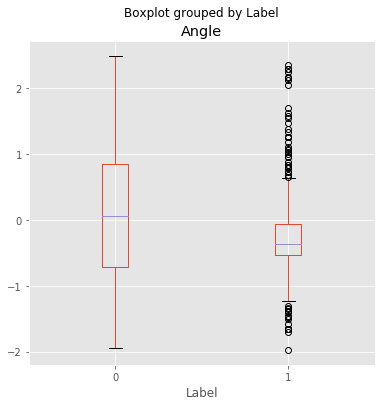

In [91]:
df_tmp = pd.concat([df_scaled['Angle'], df_x['Label']],axis=1)
df_tmp.boxplot(column=['Angle'], by='Label', figsize=(6,6))
plt.show()

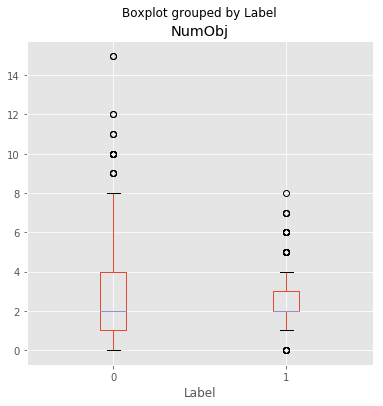

In [92]:
df_x.boxplot(column=['NumObj'], by='Label', figsize=(6,6))
plt.show()